# Classification of Forest Cover Types Using a Decision Tree Model

### Objectives:

This notebook performs the following tasks:

1. **Data Loading and Preprocessing**:
   - Loads the Covertype dataset from the UCI Machine Learning Repository.
   - Displays the dimensions of the features set and the target variable.
   - Previews the first few rows of the dataset.
   - Analyzes the unique classes and class distribution of the target variable.
   - Splits the dataset into training, validation, and test sets.
   

2. **Hyperparameter Tuning for `min_samples_split` and `max_depth`**:
   - Defines a range of values for the `min_samples_split` and `max_depth` hyperparameter.
   - Trains and evaluates a Decision Tree model for each value of `min_samples_split` and `max_depth`, recording accuracy and F1 scores for training and validation sets.
   - Plots the training and validation accuracy as well as F1 scores against different values of `min_samples_split` and `max_depth`.

3. **Building the Optimal Decision Tree Model**:
   - Trains the final Decision Tree model using the optimal values obtained from hyperparameter tuning (`min_samples_split` and `max_depth`).
   - Makes predictions on the training, validation, and test datasets.
   - Calculates and prints the accuracy and F1 scores for the trained model across all datasets.

4. **Conclusion**:
   - Summarizes the results, highlighting the best performing model based on evaluation metrics.
   - Completes the project of building a Decision Tree model for classification of forest cover types.


### This project uses data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/31/covertype). This dataset is licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0) license](https://creativecommons.org/licenses/by/4.0/legalcode). The dataset was converted into numpy arrays for building a machine learning model.

In [50]:
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# Print the dimensions of the features set (X) and the target variable (y)
print(X.shape, y.shape)

(581012, 54) (581012, 1)


In [51]:
# Display the first few rows of the features set (X)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Display the first few entries of the target variable (y)
y.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


In [53]:
# Get the unique values in the target variable (y) along with their counts to understand class distribution
np.unique(y, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]),
 array([211840, 283301,  35754,   2747,   9493,  17367,  20510]))

In [54]:
from sklearn.model_selection import train_test_split

# Convert X and y to numpy arrays for further processing
X = X.values
Y = y.values

# First split: Train + Validation and Test sets (70% for training/validation, 30% for test)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Second split: Training and Validation sets (70% of train_val data for training, 30% for validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=42, stratify=Y_train_val)

# Output the shapes of the data splits for verification
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (284695, 54) (284695, 1)
Validation set shape: (122013, 54) (122013, 1)
Testing set shape: (174304, 54) (174304, 1)


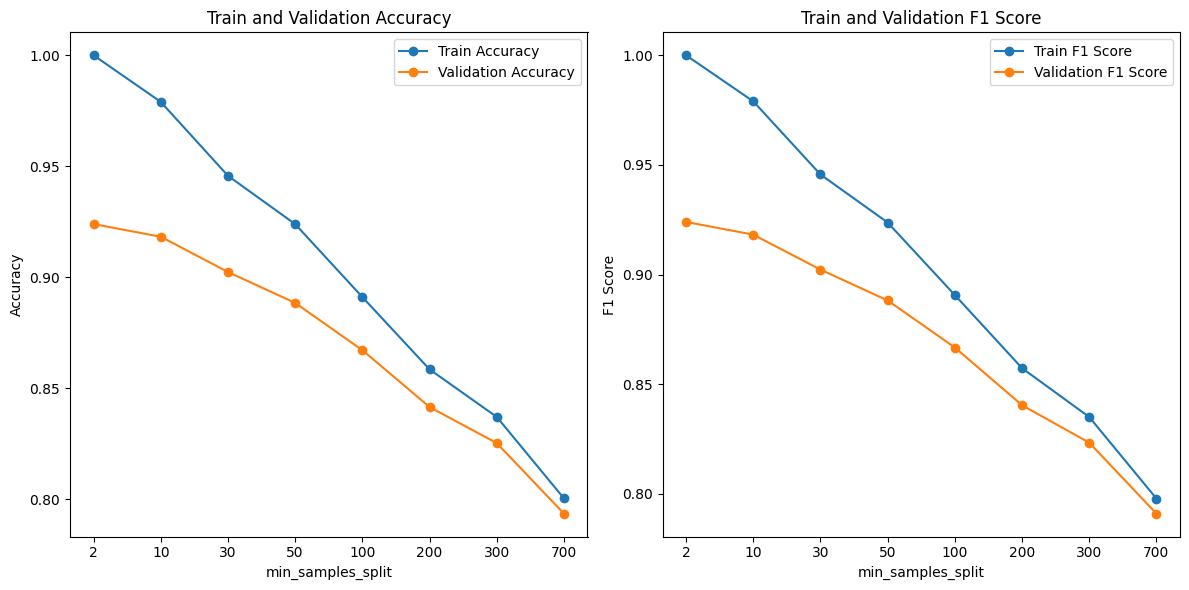

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Range of min_samples_split
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

# Lists to store evaluation metrics
evaluation_list_train = []
evaluation_list_val = []

# Train and evaluate models for different min_samples_split values
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, Y_train)

    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    accuracy_train = accuracy_score(Y_train, predictions_train)
    accuracy_val = accuracy_score(Y_val, predictions_val)

    f1_train = f1_score(Y_train, predictions_train, average="weighted")
    f1_val = f1_score(Y_val, predictions_val, average="weighted")

    evaluation_list_train.append((accuracy_train, f1_train))
    evaluation_list_val.append((accuracy_val, f1_val))

# Separate accuracy and F1 scores for plotting
accuracy_train_list, f1_train_list = zip(*evaluation_list_train)
accuracy_val_list, f1_val_list = zip(*evaluation_list_val)

# Plot accuracy and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title("Train and Validation Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_train_list, marker="o", label="Train Accuracy")
plt.plot(accuracy_val_list, marker="o", label="Validation Accuracy")
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.title("Train and Validation F1 Score")
plt.xlabel("min_samples_split")
plt.ylabel("F1 Score")
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(f1_train_list, marker="o", label="Train F1 Score")
plt.plot(f1_val_list, marker="o", label="Validation F1 Score")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

We can see in above plots that as **min_samples_split** increases, both **training accuracy** and **F1 score** show a declining trend, indicating reduced model complexity and increasing generalization. Initially, the model exhibits high **accuracy** and **F1 score** for training data but experiences a drop in validation performance, which suggests over-fitting at lower values. As the hyperparameter increases, the gap between **training** and **validation** metrics narrows, showing improved generalization but decreased overall performance.

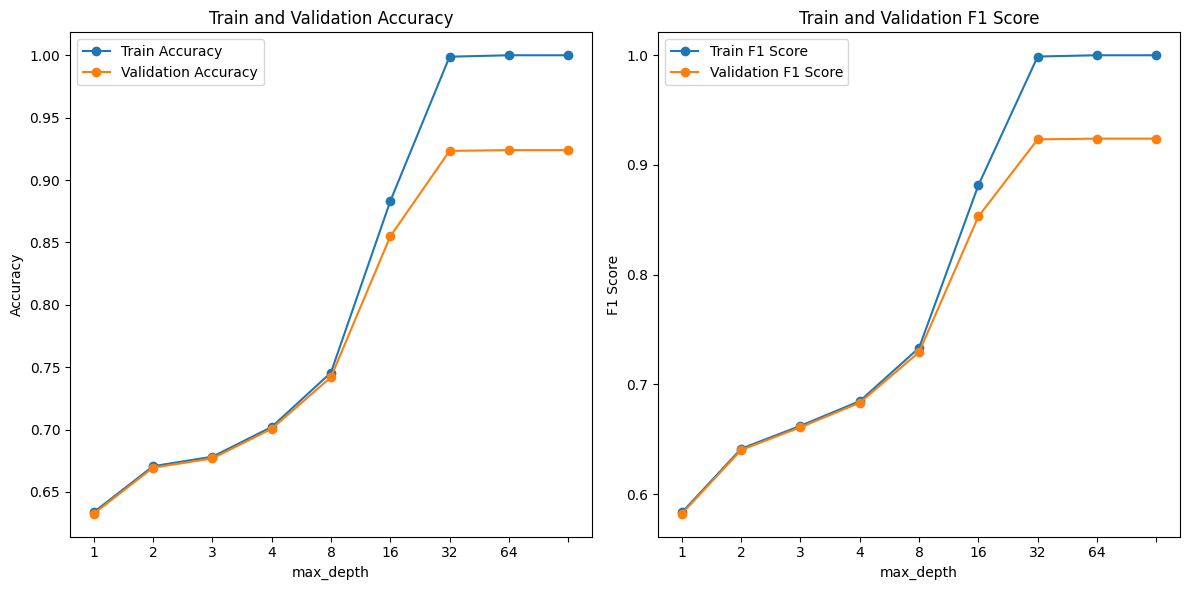

In [58]:
# Range of max_depth
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]

# Lists to store evaluation metrics
evaluation_list_train_ = []
evaluation_list_val_ = []

# Train and evaluate models for different max_depth values
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)

    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    accuracy_train = accuracy_score(Y_train, predictions_train)
    accuracy_val = accuracy_score(Y_val, predictions_val)

    f1_train = f1_score(Y_train, predictions_train, average="weighted")
    f1_val = f1_score(Y_val, predictions_val, average="weighted")

    evaluation_list_train_.append((accuracy_train, f1_train))
    evaluation_list_val_.append((accuracy_val, f1_val))

# Separate accuracy and F1 scores for plotting
accuracy_train_list_, f1_train_list_ = zip(*evaluation_list_train_)
accuracy_val_list_, f1_val_list_ = zip(*evaluation_list_val_)

# Plot accuracy and F1 scores
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.title("Train and Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train_list_, marker="o", label="Train Accuracy")
plt.plot(accuracy_val_list_, marker="o", label="Validation Accuracy")
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
plt.title("Train and Validation F1 Score")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(f1_train_list_, marker="o", label="Train F1 Score")
plt.plot(f1_val_list_, marker="o", label="Validation F1 Score")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

The plots above show the impact of varying **max_depth** on the decision tree model's performance in terms of **accuracy** and **F1 score** for both the training and validation sets. As **max_depth** increases, the **training accuracy** and **F1 score** rapidly improve, reaching 100% at higher depths, indicating a potential risk of **overfitting**. The **validation metrics**, however, show a more gradual increase, plateauing after a certain point (around **32 and forward for max_depth**). This suggests that increasing **max_depth** beyond a certain threshold no longer provides additional benefit for the **validation performance**, pointing to diminishing returns and a good balance between **model complexity** and **generalization**.

Based on the above evaluations of decision tree models on hyperparameters like **min_samples_split** and **max_depth**, the optimal value for **max_depth** is chosen to be **16**. However, for **min_samples_split**, we will use three values: **200**, **100**, and **50**, and compare the results. We will then select the one that gives the best results as the optimal value for **min_samples_split**.

In [61]:
# Train the decision tree model
decision_tree_model = DecisionTreeClassifier(min_samples_split=50,  # 100, 200
                                             max_depth=16,
                                             random_state=42).fit(X_train, Y_train)

# Predictions for training, validation, and test sets
predictions_train = decision_tree_model.predict(X_train)
predictions_val = decision_tree_model.predict(X_val)
predictions_test = decision_tree_model.predict(X_test)

# Calculate accuracy and F1 score for training, validation, and test sets
accuracy_train = accuracy_score(Y_train, predictions_train)
accuracy_val = accuracy_score(Y_val, predictions_val)
accuracy_test = accuracy_score(Y_test, predictions_test)

f1_train = f1_score(Y_train, predictions_train, average="weighted")
f1_val = f1_score(Y_val, predictions_val, average="weighted")
f1_test = f1_score(Y_test, predictions_test, average="weighted")

# Print the evaluation metrics
print(f"Train Accuracy: {accuracy_train:.4f} | Train F1 Score: {f1_train:.4f}")
print(f"Validation Accuracy: {accuracy_val:.4f} | Validation F1 Score: {f1_val:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f} | Test F1 Score: {f1_test:.4f}")

Train Accuracy: 0.8632 | Train F1 Score: 0.8613
Validation Accuracy: 0.8436 | Validation F1 Score: 0.8417
Test Accuracy: 0.8439 | Test F1 Score: 0.8419


**min_samples_split=100**

Train Accuracy: 0.8489 | Train F1 Score: 0.8468<br>
Validation Accuracy: 0.8340 | Validation F1 Score: 0.8319<br>
Test Accuracy: 0.8333 | Test F1 Score: 0.8310<br>

**min_samples_split=200**

Train Accuracy: 0.8313 | Train F1 Score: 0.8288<br>
Validation Accuracy: 0.8200 | Validation F1 Score: 0.8175<br>
Test Accuracy: 0.8188 | Test F1 Score: 0.8162<br>

The best performance is achieved with **min_samples_split=50**, as it yields the highest **accuracy** and **F1 score** on both **training**, **validation**, and **test sets**. Therefore, **50** is selected to be the optimal value for **min_samples_split** hyperparameter.

With this selection, the process of building and fine-tuning the decision tree model has been successfully completed.